In [ ]:
from google.colab import files

# กำหนดชื่อไฟล์ที่คุณต้องการดาวน์โหลด
model_filename = 'optimized_xgboost_accident_severity_model.joblib'
preprocessor_filename = 'preprocessor_accident_severity.joblib'
label_encoder_target_filename = 'target_label_encoder_accident_severity.joblib'
feature_names_filename = 'processed_feature_names.joblib'


# ใช้ฟังก์ชัน files.download เพื่อเริ่มการดาวน์โหลดสำหรับแต่ละไฟล์

# ดาวน์โหลดโมเดล
try:
    files.download(model_filename)
    print(f"กำลังดาวน์โหลด: {model_filename}")
except FileNotFoundError:
    print(f"ข้อผิดพลาด: ไม่พบไฟล์ {model_filename} ตรวจสอบว่ารันเซลล์การ Save ก่อนหน้านี้แล้ว")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการดาวน์โหลดไฟล์ {model_filename}: {e}")

# ดาวน์โหลด Preprocessor
try:
    files.download(preprocessor_filename)
    print(f"กำลังดาวน์โหลด: {preprocessor_filename}")
except FileNotFoundError:
    print(f"ข้อผิดพลาด: ไม่พบไฟล์ {preprocessor_filename} ตรวจสอบว่ารันเซลล์การ Save ก่อนหน้านี้แล้ว")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการดาวน์โหลดไฟล์ {preprocessor_filename}: {e}")

# ดาวน์โหลด LabelEncoder
try:
    files.download(label_encoder_target_filename)
    print(f"กำลังดาวน์โหลด: {label_encoder_target_filename}")
except FileNotFoundError:
    print(f"ข้อผิดพลาด: ไม่พบไฟล์ {label_encoder_target_filename} ตรวจสอบว่ารันเซลล์การ Save ก่อนหน้านี้แล้ว")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการดาวน์โหลดไฟล์ {label_encoder_target_filename}: {e}")

# ดาวน์โหลดรายการชื่อ Feature
try:
    files.download(feature_names_filename)
    print(f"กำลังดาวน์โหลด: {feature_names_filename}")
except FileNotFoundError:
    print(f"ข้อผิดพลาด: ไม่พบไฟล์ {feature_names_filename} ตรวจสอบว่ารันเซลล์การ Save ก่อนหน้านี้แล้ว")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการดาวน์โหลดไฟล์ {feature_names_filename}: {e}")

print("\nหากไม่มีข้อผิดพลาด จะมีหน้าต่างดาวน์โหลดปรากฏขึ้นสำหรับแต่ละไฟล์")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

กำลังดาวน์โหลด: optimized_xgboost_accident_severity_model.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

กำลังดาวน์โหลด: preprocessor_accident_severity.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

กำลังดาวน์โหลด: target_label_encoder_accident_severity.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

กำลังดาวน์โหลด: processed_feature_names.joblib

หากไม่มีข้อผิดพลาด จะมีหน้าต่างดาวน์โหลดปรากฏขึ้นสำหรับแต่ละไฟล์


Libraries imported successfully!
Data loaded successfully from URL!
Original dataset shape: (81735, 22)

First 5 rows of the dataset (df):


,acc_code,incident_datetime,incident_datetime.1,report_datetime,province_th,province_en,agency,route,vehicle_type,presumed_cause,...,number_of_fatalities,number_of_injuries,accident_severity,accident_severity_Class,weather_condition,latitude,longitude,road_description,slope_description,Holiday
0,571905,1/1/2019,1/1/2019,2/1/2019 6:11,ลพบุรี,Loburi,department of rural roads,แยกทางหลวงหมายเลข 21 (กม.ที่ 31+000) - บ้านวัง...,motorcycle,driving under the influence of alcohol,...,0.0,2.0,2.0,Low,clear,14.959105,100.873463,straight road,no slope,1
1,3790870,1/1/2019 0:03,1/1/2019,20/2/2020 13:48,อุบลราชธานี,Ubon Ratchathani,department of highways,เดชอุดม - อุบลราชธานี,private/passenger car,speeding,...,0.0,2.0,2.0,Low,clear,15.210738,104.862689,straight road,no slope,1
2,599075,1/1/2019 0:05,1/1/2019,1/1/2019 10:35,ประจวบคีรีขันธ์,Prachuap Khiri Khan,department of highways,ปราณบุรี - ปากน้ำปราณ,motorcycle,speeding,...,1.0,0.0,1.0,Low,clear,12.374259,99.907949,wide curve,slope area,1
3,571924,1/1/2019 0:20,1/1/2019,2/1/2019 5:12,เชียงใหม่,Chiang Mai,department of rural roads,เชื่อมทางหลวงหมายเลข 1013 (กม.ที่ 8+200) - บ้า...,motorcycle,driving under the influence of alcohol,...,0.0,1.0,1.0,Low,clear,18.601721,98.804204,straight road,no slope,1
4,599523,1/1/2019 0:25,1/1/2019,4/1/2019 9:42,นครสวรรค์,Nakhon Sawan,department of highways,เกยไชย - ศรีมงคล,private/passenger car,cutting in closely by people/vehicles/animals,...,0.0,0.0,0.0,Very Low,clear,15.866389,100.590010,straight road,no slope,1



Dataset info (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81735 entries, 0 to 81734
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   acc_code                     81735 non-null  int64  
 1   incident_datetime            81735 non-null  object 
 2   incident_datetime.1          81735 non-null  object 
 3   report_datetime              81735 non-null  object 
 4   province_th                  81735 non-null  object 
 5   province_en                  81735 non-null  object 
 6   agency                       81735 non-null  object 
 7   route                        81735 non-null  object 
 8   vehicle_type                 81735 non-null  object 
 9   presumed_cause               81735 non-null  object 
 10  accident_type                81735 non-null  object 
 11  number_of_vehicles_involved  81735 non-null  float64
 12  number_of_fatalities         81735 non-null  fl

,count,mean,std,min,25%,50%,75%,max
acc_code,81735.0,4.235766e+06,2.128207e+06,571834.000000,3.789460e+06,3.824084e+06,5.831088e+06,7.571316e+06
number_of_vehicles_involved,81735.0,1.534704e+00,8.073951e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.700000e+01
number_of_fatalities,81735.0,1.455680e-01,4.338159e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
number_of_injuries,81735.0,8.118554e-01,1.461861e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.100000e+01
accident_severity,81735.0,9.574234e-01,1.542134e+00,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,5.700000e+01
latitude,81376.0,1.437754e+01,3.065689e+00,-0.001108,1.351011e+01,1.446888e+01,1.656741e+01,4.154951e+01
longitude,81376.0,1.008088e+02,1.484859e+00,18.017161,9.988551e+01,1.005555e+02,1.012922e+02,1.055172e+02
Holiday,81735.0,8.994923e-02,2.861108e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00



Summary statistics for object/categorical features (df.describe(include='object')):


,count,unique,top,freq
incident_datetime,81735,67917,30/12/2020 19:00,12
incident_datetime.1,81735,1461,28/12/2019,396
report_datetime,81735,66234,29/12/2022 11:39,29
province_th,81735,78,กรุงเทพมหานคร,6439
province_en,81735,78,Bangkok,6439
agency,81735,3,department of highways,75304
route,81735,3882,ไม่ทราบ,2060
vehicle_type,81735,15,4-wheel pickup truck,28445
presumed_cause,81735,54,speeding,60373
accident_type,81735,11,rollover/fallen on straight road,33046



--- Correlation Matrix for Numerical Features ---


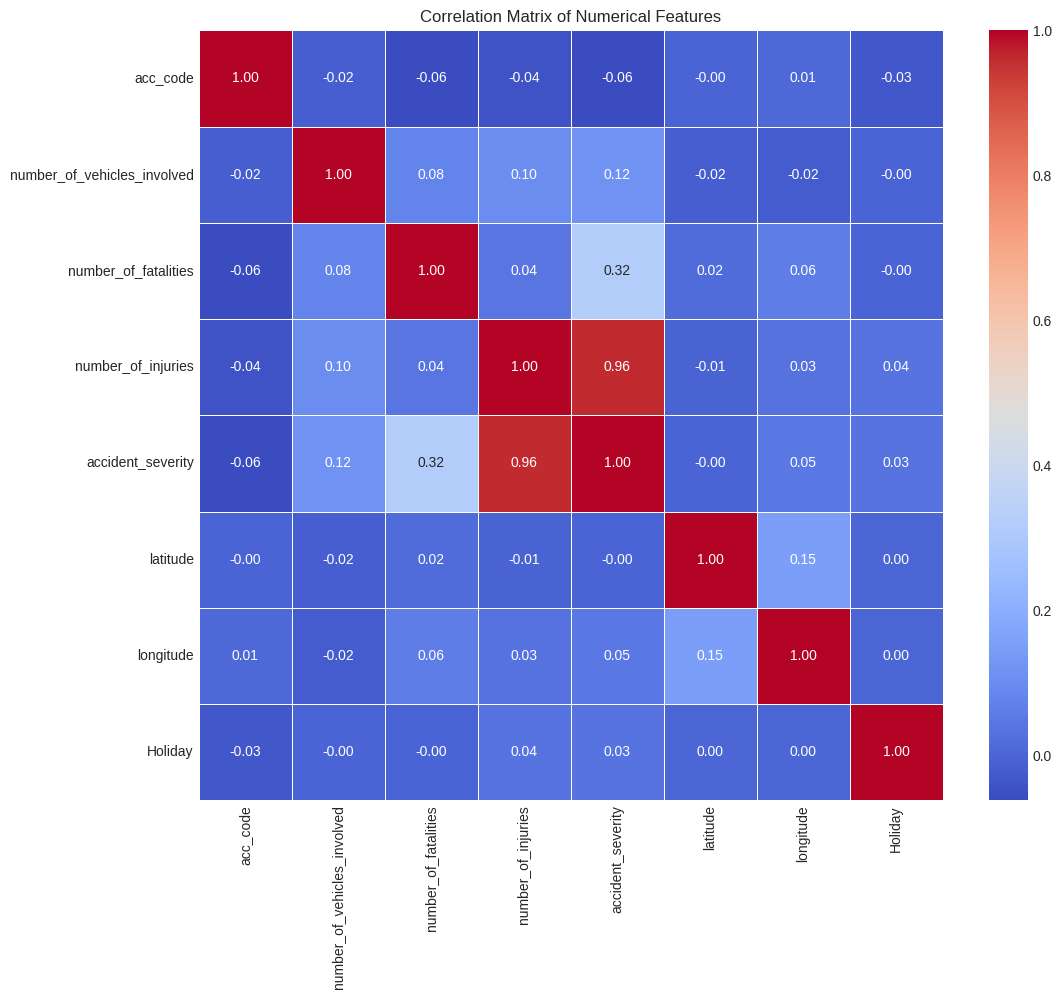


Correlation Matrix values:


,acc_code,number_of_vehicles_involved,number_of_fatalities,number_of_injuries,accident_severity,latitude,longitude,Holiday
acc_code,1.000000,-0.018143,-0.061143,-0.042121,-0.057128,-0.001216,0.005383,-0.033746
number_of_vehicles_involved,-0.018143,1.000000,0.077724,0.103645,0.120114,-0.018431,-0.023535,-0.000802
number_of_fatalities,-0.061143,0.077724,1.000000,0.041740,0.320876,0.017162,0.060819,-0.001993
number_of_injuries,-0.042121,0.103645,0.041740,1.000000,0.959689,-0.006848,0.031171,0.036894
accident_severity,-0.057128,0.120114,0.320876,0.959689,1.000000,-0.001663,0.046666,0.034413
latitude,-0.001216,-0.018431,0.017162,-0.006848,-0.001663,1.000000,0.152652,0.001976
longitude,0.005383,-0.023535,0.060819,0.031171,0.046666,0.152652,1.000000,0.002384
Holiday,-0.033746,-0.000802,-0.001993,0.036894,0.034413,0.001976,0.002384,1.000000



--- 3.1 Target Variable Exploration ('accident_severity') ---
Original 'accident_severity' value counts (including NaNs):
accident_severity
0.0     35275
1.0     30926
2.0      9327
3.0      3031
4.0      1319
5.0       697
6.0       369
7.0       219
8.0       142
9.0        81
10.0       79
11.0       54
12.0       42
13.0       37
14.0       21
15.0       21
16.0       10
17.0       16
18.0       10
19.0        9
20.0        5
21.0        6
22.0        7
23.0        4
24.0        1
25.0        3
27.0        2
28.0        1
29.0        1
30.0        4
31.0        2
32.0        1
33.0        1
35.0        2
36.0        1
38.0        1
40.0        1
42.0        1
43.0        2
47.0        1
49.0        1
54.0        1
57.0        1
Name: count, dtype: int64

'accident_severity' after attempting numeric conversion (errors become NaN):
severity_temp_numeric
0.0     35275
1.0     30926
2.0      9327
3.0      3031
4.0      1319
5.0       697
6.0       369
7.0       219
8.0       142
9.0  

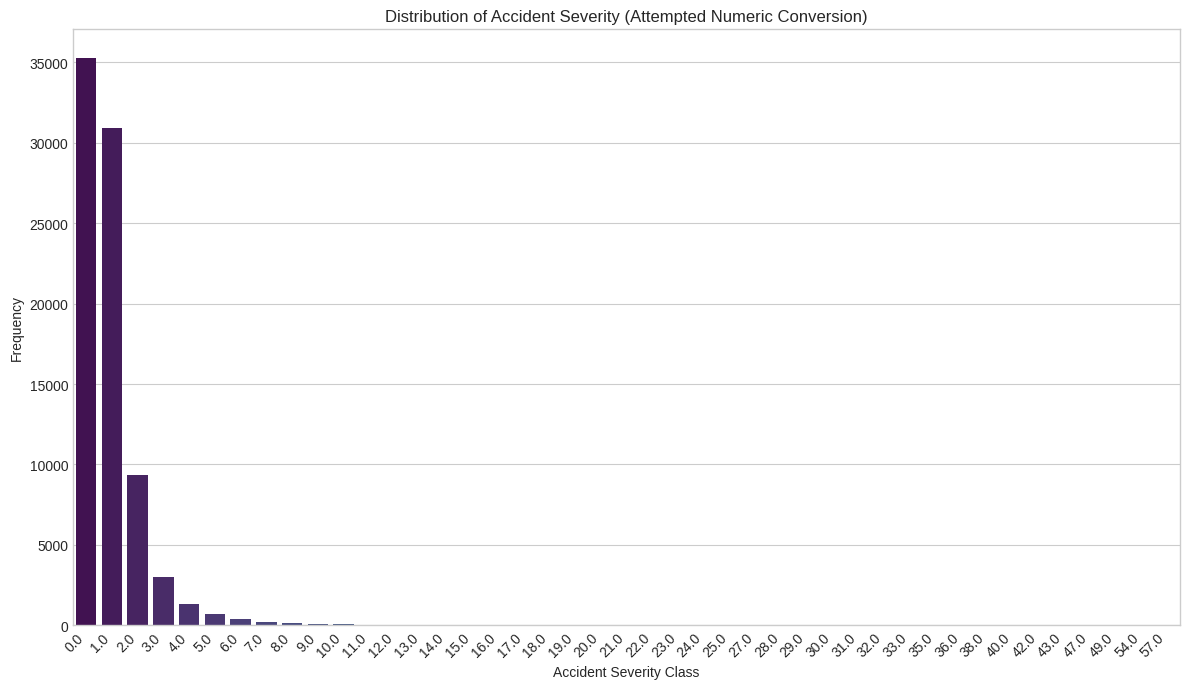


--- 3.2 Missing Values Analysis ---

Missing values count and percentage per column (columns with missing values only):


,Missing Count,Missing Percentage
latitude,359,0.439224
longitude,359,0.439224


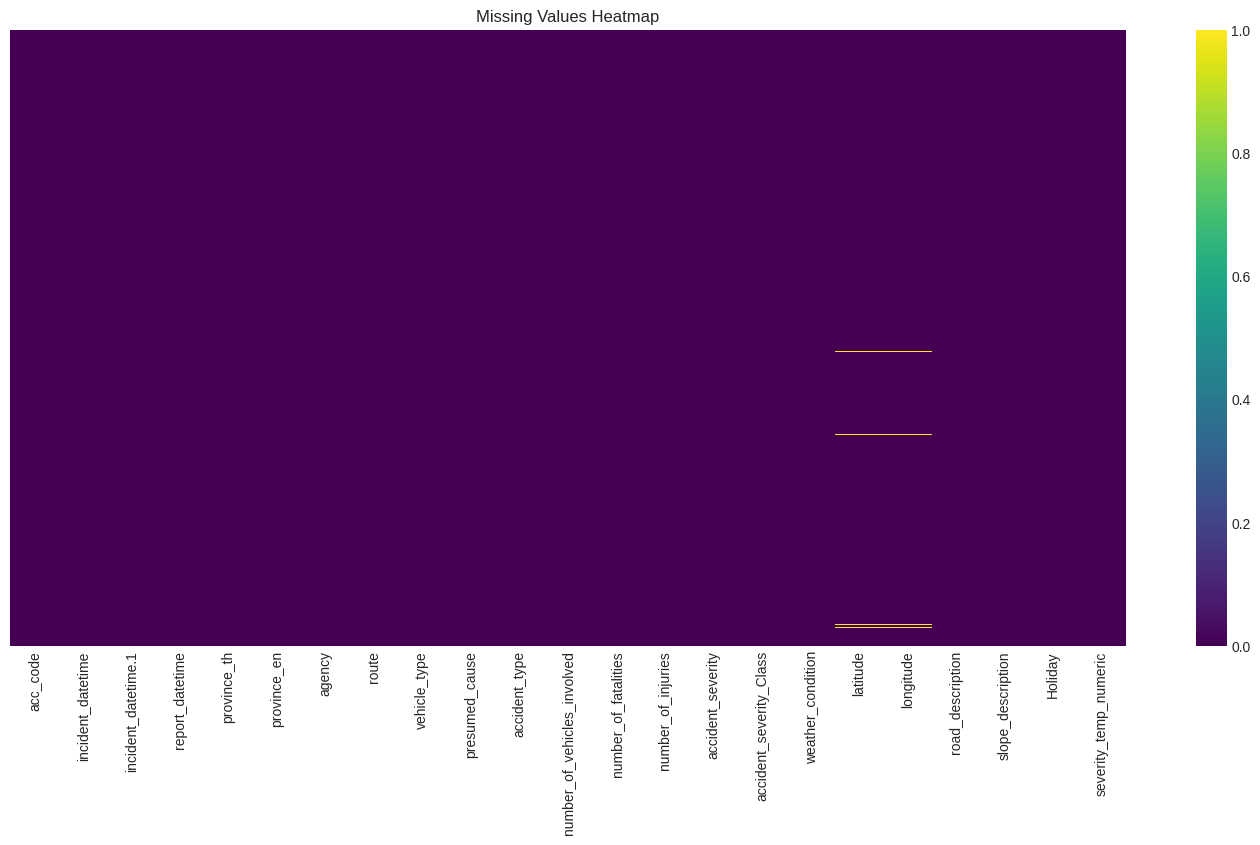


--- 4.1 Handling Target Variable ('accident_severity') ---
Number of NaNs in 'accident_severity' after initial to_numeric: 0
Defined valid severities for this project as: [0.0, 1.0, 2.0, 3.0]
Number of NaNs in 'accident_severity' after filtering out non-valid numeric values: 3176
Dropped 3176 rows due to NaN/invalid target values.
Current shape of df after cleaning target: (78559, 23)

'accident_severity' (cleaned) converted to integer type.
Value counts for 'accident_severity' (cleaned):
accident_severity
0    35275
1    30926
2     9327
3     3031
Name: count, dtype: int64

Target column for modeling will be: 'accident_severity_encoded'
Value counts for 'accident_severity_encoded':
accident_severity_encoded
0    35275
1    30926
2     9327
3     3031
Name: count, dtype: int64
Mapping of original cleaned severity to encoded severity:
Original Cleaned: 0 -> Encoded: 0
Original Cleaned: 1 -> Encoded: 1
Original Cleaned: 2 -> Encoded: 2
Original Cleaned: 3 -> Encoded: 3

--- 4.2 Feature

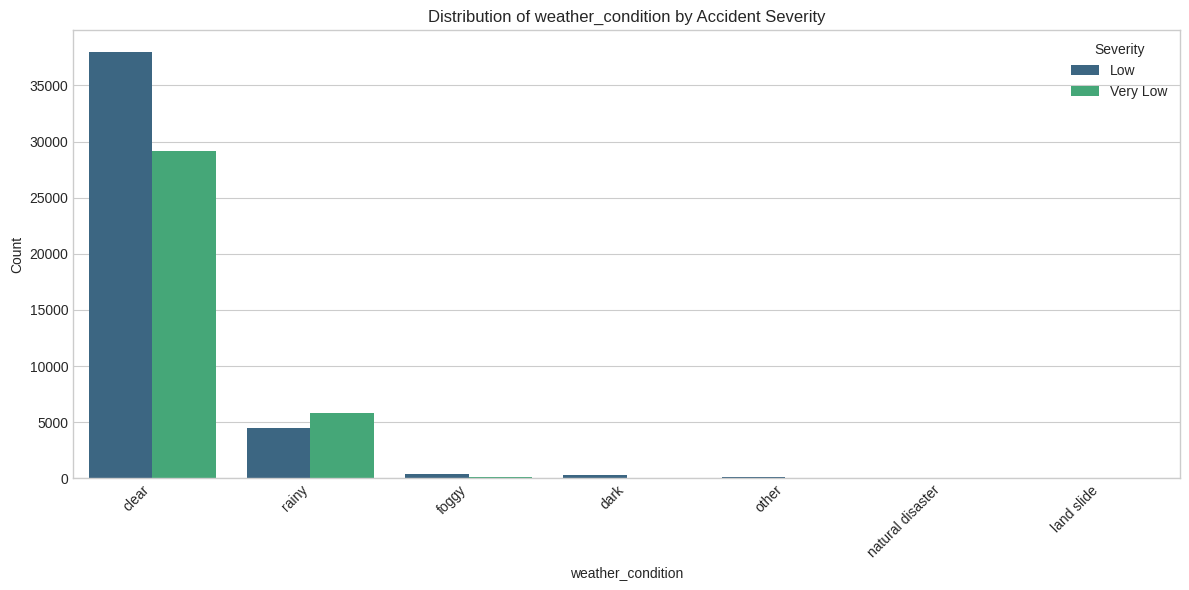

Visualizing top 10 categories for 'road_description'.


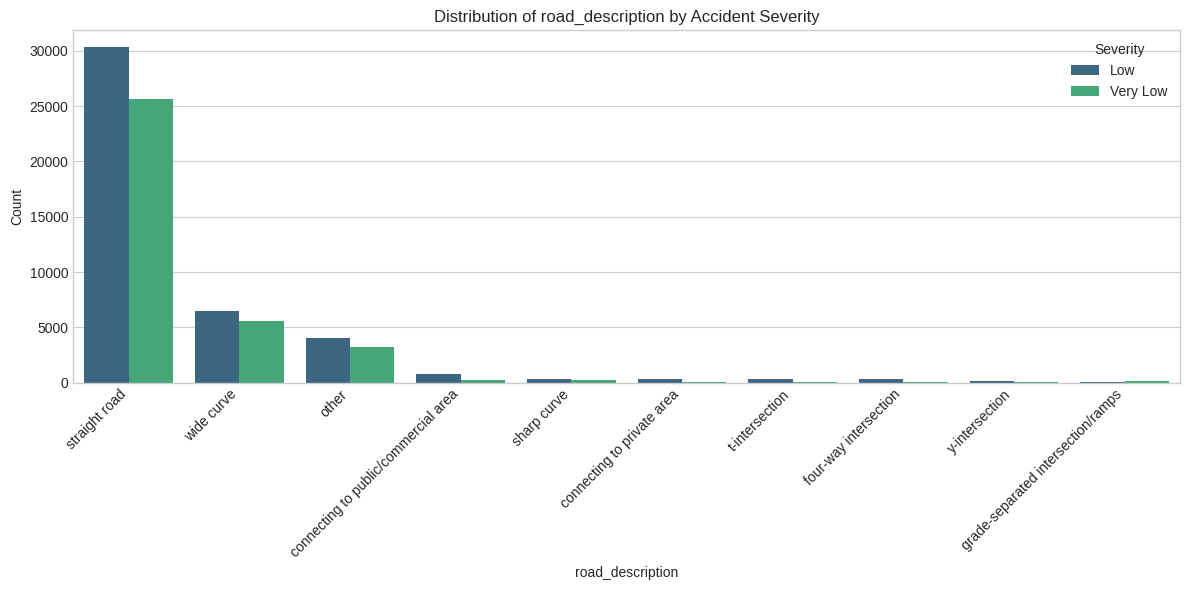

Visualizing top 10 categories for 'slope_description'.


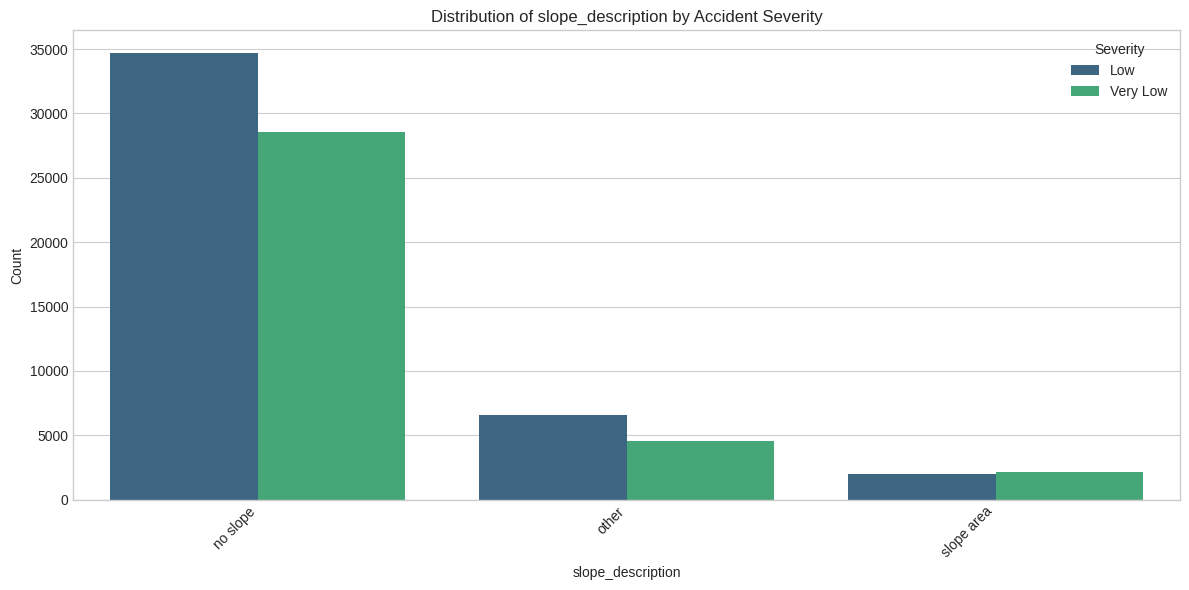

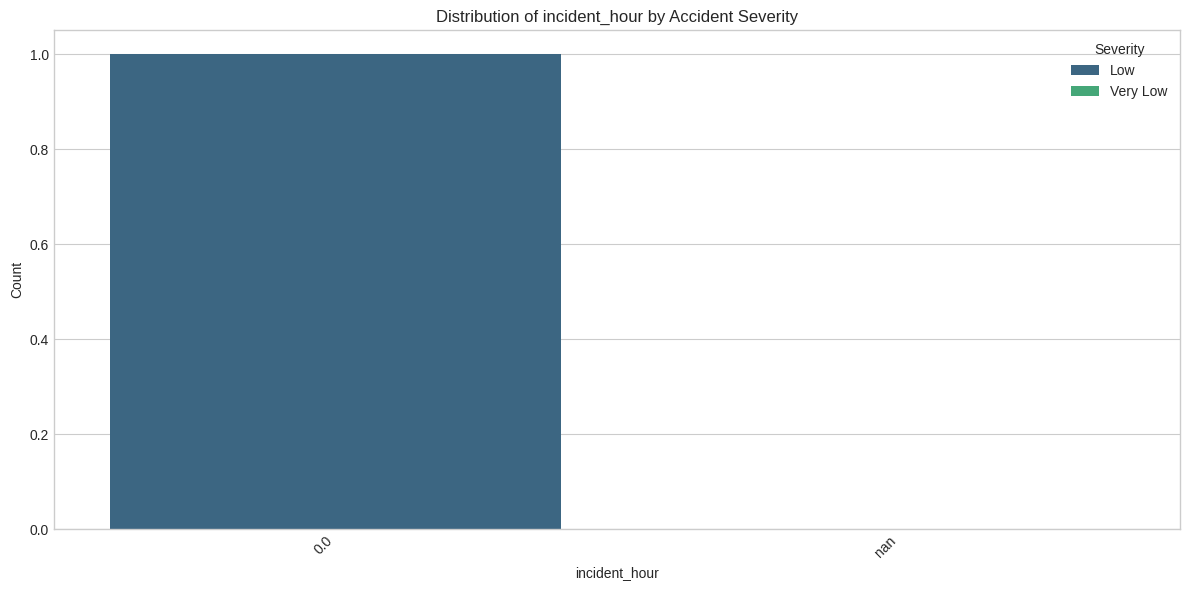

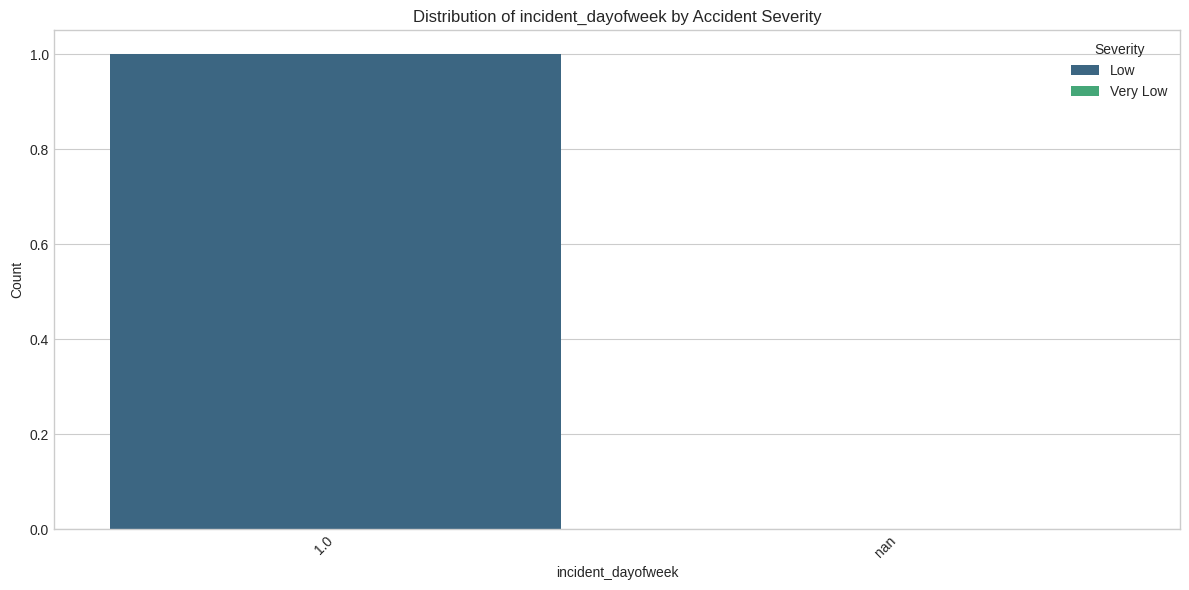

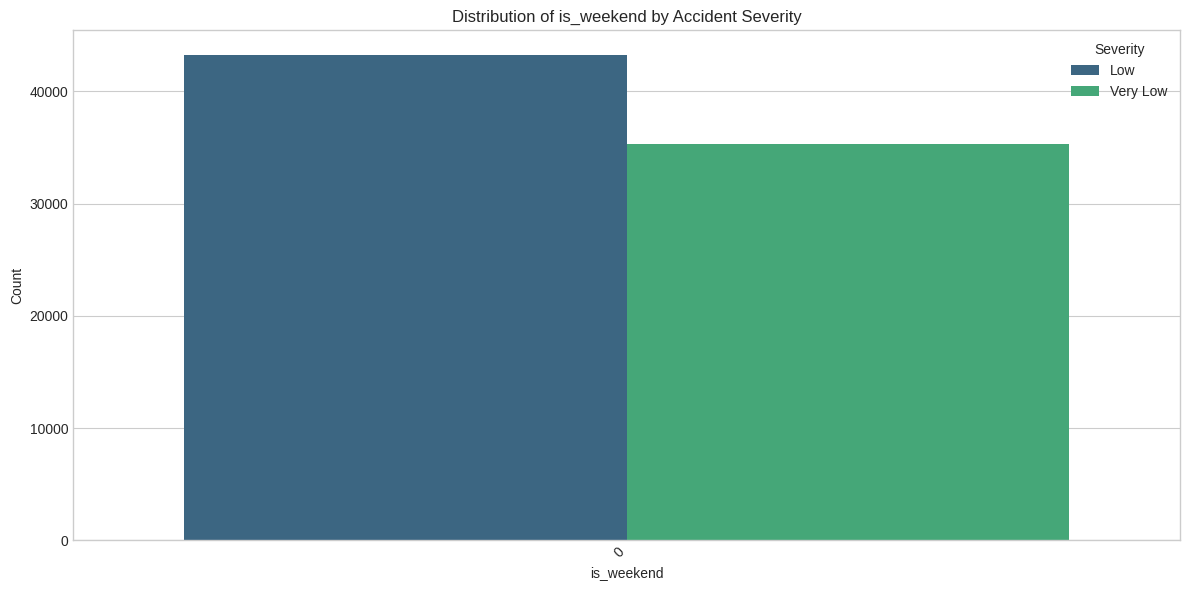


Shape of X (environmental features) before splitting: (78559, 11)
Shape of y (encoded target) before splitting: (78559,)

Target variable distribution before splitting (encoded values):
accident_severity_encoded
0    0.449026
1    0.393666
2    0.118726
3    0.038582
Name: proportion, dtype: float64

Successfully performed initial stratified split (train_val / test).
Successfully performed second stratified split (train / validation).

--- Shapes after splitting ---
X_train shape: (47135, 11), y_train shape: (47135,)
X_val shape: (15712, 11), y_val shape: (15712,)
X_test shape: (15712, 11), y_test shape: (15712,)

Target distribution in y_train:
accident_severity_encoded
0    0.449029
1    0.393657
2    0.118723
3    0.038591
Name: proportion, dtype: float64

Target distribution in y_val:
accident_severity_encoded
0    0.449020
1    0.393712
2    0.118699
3    0.038569
Name: proportion, dtype: float64

Target distribution in y_test:
accident_severity_encoded
0    0.449020
1    0.39364

,num__latitude,num__longitude,num__Holiday,num__is_weekend,cat__weather_condition_clear,cat__weather_condition_dark,cat__weather_condition_foggy,cat__weather_condition_natural disaster,cat__weather_condition_other,cat__weather_condition_rainy,...,cat__road_description_t-intersection,cat__road_description_u-turn area,cat__road_description_wide curve,cat__road_description_y-intersection,cat__slope_description_no slope,cat__slope_description_other,cat__slope_description_slope area,cat__agency_department of highways,cat__agency_department of rural roads,cat__agency_expressway authority of thailand
49952,-2.321180,-0.465647,-0.318738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
24989,-0.279805,-0.375747,3.137373,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43309,-2.062300,-0.711330,-0.318738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
46354,-1.852595,-0.998020,-0.318738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
41052,0.813714,-1.158894,-0.318738,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


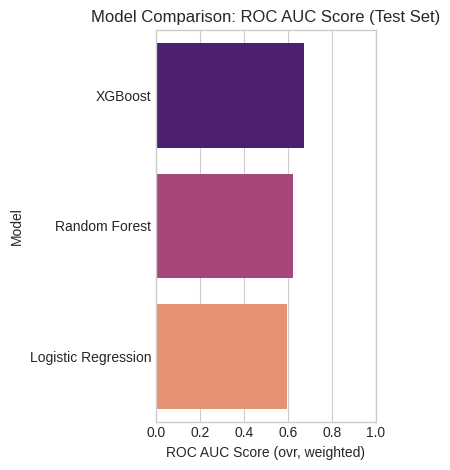


--- Notes on Model Selection ---
Key metrics to consider for selecting the best model:
1. **Recall for high-severity classes:** Check individual Classification Reports from evaluate_model output. This is often critical for safety-related problems.
2. **Weighted F1-Score:** Good overall balance of precision and recall across all classes, especially for imbalanced datasets.
3. **ROC AUC Score (ovr, weighted):** Overall ability of the model to distinguish between classes.
4. Interpretability vs. Performance: Simpler models (like Logistic Regression) are easier to interpret.
5. Training/Prediction time if it's a constraint for deployment (not explicitly measured here but can be a factor).

Based on sorting by Weighted F1-Score then ROC AUC, the best model appears to be: XGBoost
  - Test Set Weighted F1-Score: 0.5040
  - Test Set ROC AUC (ovr, weighted): 0.6744

--- Feature Importances from Best Overall Model: XGBoost ---


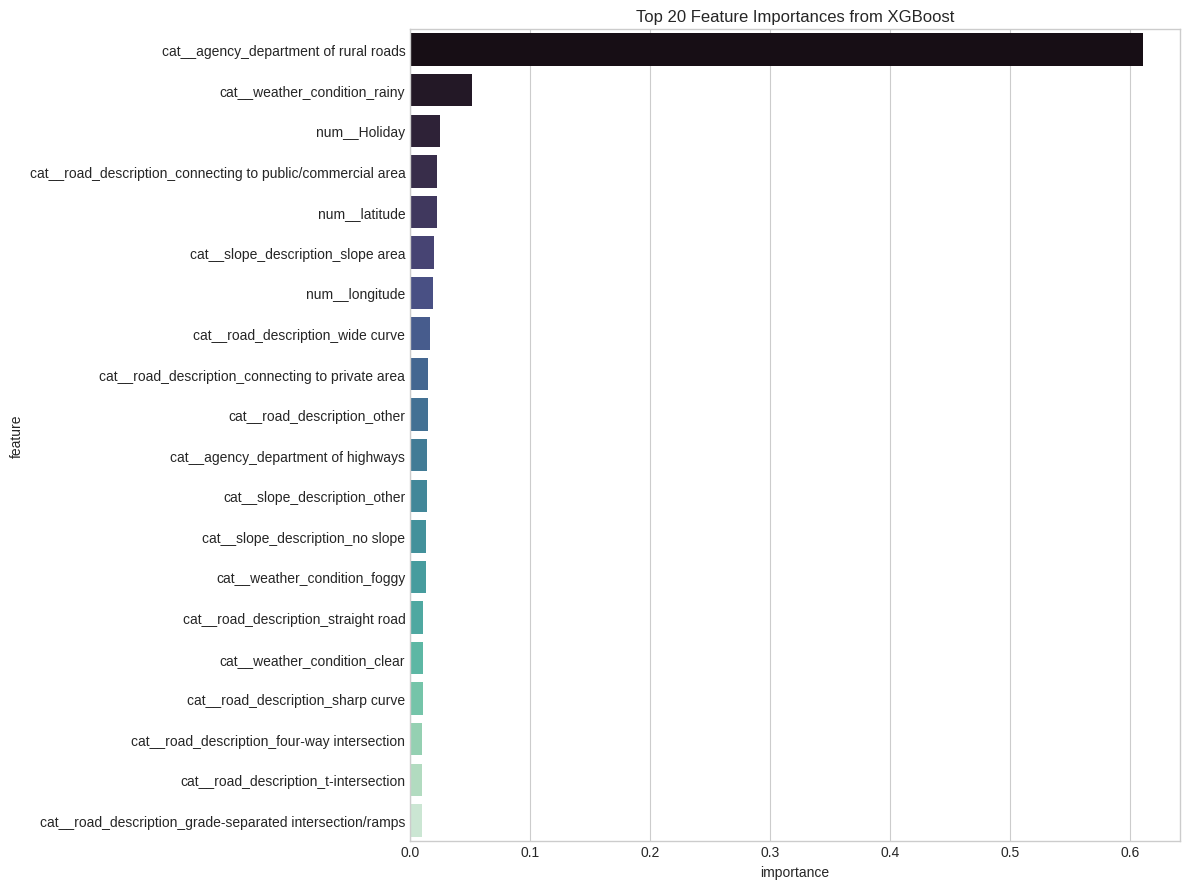


Top 10 Features (from tree-based model):


,feature,importance
31,cat__agency_department of rural roads,0.611174
9,cat__weather_condition_rainy,0.051560
2,num__Holiday,0.025157
12,cat__road_description_connecting to public/com...,0.022442
0,num__latitude,0.022420
29,cat__slope_description_slope area,0.020009
1,num__longitude,0.018853
25,cat__road_description_wide curve,0.016448
11,cat__road_description_connecting to private area,0.014766
19,cat__road_description_other,0.014463


Saved the best model (XGBoost) to: xgboost_accident_severity_model.joblib
Saved the Preprocessor to: preprocessor_accident_severity.joblib
Saved the LabelEncoder for target variable to: target_label_encoder_accident_severity.joblib
Saved the list of processed feature names to: processed_feature_names.joblib


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Utility
import joblib # For saving models
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

# Set plotting style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

print("Libraries imported successfully!")

# === 2. Data Loading ===
# Purpose: Load the dataset from the provided URL into a pandas DataFrame.
CSV_URL = "https://raw.githubusercontent.com/CatastropheCat/MyFinal/refs/heads/main/thai_road_accident_2019_2022_final.csv"

try:
    df_raw = pd.read_csv(CSV_URL)
    print("Data loaded successfully from URL!")
    print(f"Original dataset shape: {df_raw.shape}")
    # Create a copy for manipulation to preserve the original raw data
    df = df_raw.copy()
except FileNotFoundError:
    print(f"Error: The data file from URL '{CSV_URL}' was not found or an error occurred.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors in subsequent cells
except Exception as e:
    print(f"An error occurred during data loading: {e}")
    df = pd.DataFrame()

if not df.empty:
    print("\nFirst 5 rows of the dataset (df):")
    display(df.head())
    print("\nDataset info (df.info()):")
    # show_counts=True is useful for quickly seeing non-null counts per column
    df.info(verbose=True, show_counts=True)
    print("\nSummary statistics for numerical features (df.describe(include=np.number)):")
    display(df.describe(include=np.number).T) # .T transposes for better readability
    print("\nSummary statistics for object/categorical features (df.describe(include='object')):")
    display(df.describe(include=['object']).T)
else:
    print("\nDataFrame is empty. Cannot proceed with the analysis.")

# === Code สำหรับแสดง Correlation Matrix ===
# ตรวจสอบว่า DataFrame df ไม่ว่างเปล่า
if not df.empty:
    print("\n--- Correlation Matrix for Numerical Features ---")
    # เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
    df_numeric = df.select_dtypes(include=np.number)

    if not df_numeric.empty:
        # คำนวณ Correlation Matrix
        correlation_matrix = df_numeric.corr()

        # แสดง Heatmap ของ Correlation Matrix
        plt.figure(figsize=(12, 10)) # ปรับขนาดรูปให้เหมาะสม
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()

        print("\nCorrelation Matrix values:")
        display(correlation_matrix)
    else:
        print("No numerical features found in the DataFrame to calculate correlation.")
else:
    print("\nDataFrame 'df' is empty. Cannot calculate correlation matrix.")

# <code_cell>
# === 3. Data Exploration (EDA) & Initial Understanding ===
# Purpose: Explore the data to understand its structure, identify potential issues, and visualize distributions.
if not df.empty:
    print("\n--- 3.1 Target Variable Exploration ('accident_severity') ---")
    if 'accident_severity' in df.columns:
        print("Original 'accident_severity' value counts (including NaNs):")
        # Display value counts sorted by index for easier comparison
        print(df['accident_severity'].value_counts(dropna=False).sort_index())

        # Attempt to convert to numeric to identify non-numeric issues and then plot
        df['severity_temp_numeric'] = pd.to_numeric(df['accident_severity'], errors='coerce')
        print("\n'accident_severity' after attempting numeric conversion (errors become NaN):")
        print(df['severity_temp_numeric'].value_counts(dropna=False).sort_index())

        plt.figure(figsize=(12, 7)) # Adjusted figure size
        sns.countplot(x='severity_temp_numeric', data=df, order=df['severity_temp_numeric'].value_counts().sort_index().index, palette='viridis')
        plt.title('Distribution of Accident Severity (Attempted Numeric Conversion)')
        plt.xlabel('Accident Severity Class')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if there are many classes
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()
    else:
        print("Warning: 'accident_severity' column not found at this stage of EDA.")

    print("\n--- 3.2 Missing Values Analysis ---")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})

    print("\nMissing values count and percentage per column (columns with missing values only):")
    missing_info_filtered = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    if not missing_info_filtered.empty:
        display(missing_info_filtered)
        # Visualization of missing values
        plt.figure(figsize=(18, 8))
        sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
        plt.title('Missing Values Heatmap')
        plt.show()
    else:
        print("No missing values found in the dataset.")

    # Note: Further EDA on relationships between environmental features and the (cleaned) target variable
    # should be done after the target variable is properly processed in Section 4.
else:
    print("\nDataFrame is empty. Skipping EDA.")

# === 4. Data Cleaning & Preprocessing ===
# This section includes:
# 4.1 Handling the Target Variable ('accident_severity')
# 4.2 Feature Engineering (e.g., Datetime features)
# 4.3 Defining Features (X) and Target (y), and selecting relevant environmental features
# 4.4 Building Preprocessing Pipelines for numerical and categorical features

le_target = None # Initialize LabelEncoder for target
TARGET_COL_NAME = None # Initialize target column name for models
preprocessor = None # Initialize preprocessor object
X = None # Initialize features DataFrame
y = None # Initialize target Series
# Initialize lists for feature names, these will be populated after feature selection
environmental_numerical_features = []
environmental_categorical_features = []


if not df.empty:
    print("\n--- 4.1 Handling Target Variable ('accident_severity') ---")
    if 'accident_severity' in df.columns:
        # Step 1: Ensure 'accident_severity' is numeric, coercing errors.
        df['accident_severity'] = pd.to_numeric(df['accident_severity'], errors='coerce')
        print(f"Number of NaNs in 'accident_severity' after initial to_numeric: {df['accident_severity'].isnull().sum()}")

        # Step 2: Define valid severities and handle invalid numeric values.
        # **CRITICAL STEP: This definition MUST be based on the data dictionary or thorough EDA.**
        # From Final_Model_2.ipynb, 'accident_severity_Class' had 'Low', 'Very Low', 'Medium', 'High'.
        # Let's assume these correspond to numeric values 0, 1, 2, 3 respectively for this project.
        # All other numeric values (like 4 to 22, or 30.0 found in Final_Model_2) will be treated as invalid.
        valid_severities = [0.0, 1.0, 2.0, 3.0] # Example: 0=Very Low, 1=Low, 2=Medium, 3=High
        print(f"Defined valid severities for this project as: {valid_severities}")

        # Convert values not in `valid_severities` to NaN
        df.loc[~df['accident_severity'].isin(valid_severities), 'accident_severity'] = np.nan
        print(f"Number of NaNs in 'accident_severity' after filtering out non-valid numeric values: {df['accident_severity'].isnull().sum()}")

        # Step 3: Drop rows where 'accident_severity' is NaN (after coercion and filtering).
        original_rows = len(df)
        df.dropna(subset=['accident_severity'], inplace=True)
        rows_dropped = original_rows - len(df)
        print(f"Dropped {rows_dropped} rows due to NaN/invalid target values.")
        print(f"Current shape of df after cleaning target: {df.shape}")

        if not df.empty and df['accident_severity'].notna().all():
            # Step 4: Ensure target is integer type.
            df['accident_severity'] = df['accident_severity'].astype(int)
            print("\n'accident_severity' (cleaned) converted to integer type.")
            print("Value counts for 'accident_severity' (cleaned):")
            print(df['accident_severity'].value_counts().sort_index())

            # Step 5: Label Encoding for target variable to be 0-indexed (0, 1, 2, ...).
            le_target = LabelEncoder()
            df['accident_severity_encoded'] = le_target.fit_transform(df['accident_severity'])
            TARGET_COL_NAME = 'accident_severity_encoded'
            print(f"\nTarget column for modeling will be: '{TARGET_COL_NAME}'")
            print("Value counts for 'accident_severity_encoded':")
            print(df[TARGET_COL_NAME].value_counts().sort_index())
            print("Mapping of original cleaned severity to encoded severity:")
            for original, encoded in zip(le_target.classes_, le_target.transform(le_target.classes_)):
                print(f"Original Cleaned: {original} -> Encoded: {encoded}")
        else:
            print("Critical Error: 'accident_severity' could not be properly cleaned or DataFrame is empty after cleaning target.")
            df = pd.DataFrame() # Critical failure, empty df
    else:
        print("Critical Error: 'accident_severity' column not found for cleaning.")
        df = pd.DataFrame() # Critical failure

    # Clean up temporary column used in EDA
    if 'severity_temp_numeric' in df.columns:
        df.drop('severity_temp_numeric', axis=1, inplace=True, errors='ignore')

if not df.empty and TARGET_COL_NAME:
    print("\n--- 4.2 Feature Engineering (Datetime based on 'incident_datetime') ---")
    if 'incident_datetime' in df.columns:
        # Ensure 'incident_datetime' is in datetime format
        if df['incident_datetime'].dtype == 'object':
            df['incident_datetime'] = pd.to_datetime(df['incident_datetime'], errors='coerce')

        if pd.api.types.is_datetime64_any_dtype(df['incident_datetime']):
            df['incident_hour'] = df['incident_datetime'].dt.hour
            df['incident_dayofweek'] = df['incident_datetime'].dt.dayofweek # Monday=0, Sunday=6
            df['incident_month'] = df['incident_datetime'].dt.month
            df['is_weekend'] = (df['incident_dayofweek'] >= 5).astype(int)
            print("Datetime features engineered: incident_hour, incident_dayofweek, incident_month, is_weekend.")
        else:
            print("Warning: 'incident_datetime' could not be converted to datetime. Skipping datetime feature engineering.")
    else:
        print("Warning: 'incident_datetime' column not found. Skipping datetime feature engineering.")

    print("\n--- 4.3 Defining Features (X) and Target (y), and Selecting Environmental Features ---")
    # Target variable (y) is the encoded severity
    y = df[TARGET_COL_NAME]

    # Features (X): Start with all columns except target-related ones
    columns_to_exclude_from_X_initially = [
        TARGET_COL_NAME, 'accident_severity', 'accident_severity_Class', # Target and related - KEEPING accident_severity_Class for EDA
        'acc_code', 'OBJECTID', 'id', # Identifiers
        'incident_datetime', 'incident_datetime.1', 'report_datetime', # Original datetime strings/objects
        'province_th', # Using province_en for consistency if needed, or lat/lon
        'route', # Too many unique values, potentially data leakage
        'ad_state_name', 'prov_name', 'district_name', 'subdist_name', # Detailed location names
        'place_name', 'village_name', 'road_name', # More detailed location names
        'presumed_cause', 'cause_group_name', 'cause_name', # Causes are outcomes/correlates, not environment for prediction
        'accident_type', 'vehicle_type' # These might be outcomes or related to driver, not purely environment
    ]
    # Line 202: Updated column list to exclude 'accident_severity' explicitly from X
    columns_to_exclude_from_X_initially = [
        TARGET_COL_NAME, 'accident_severity', # Explicitly exclude 'accident_severity'
        'accident_severity_Class', # Keep 'accident_severity_Class' for EDA
        'acc_code', 'OBJECTID', 'id', # Identifiers
        'incident_datetime', 'incident_datetime.1', 'report_datetime', # Original datetime strings/objects
        'province_th', # Using province_en for consistency if needed, or lat/lon
        'route', # Too many unique values, potentially data leakage
        'ad_state_name', 'prov_name', 'district_name', 'subdist_name', # Detailed location names
        'place_name', 'village_name', 'road_name', # More detailed location names
        'presumed_cause', 'cause_group_name', 'cause_name', # Causes are outcomes/correlates, not environment for prediction
        'accident_type', 'vehicle_type' # These might be outcomes or related to driver, not purely environment
    ]
    X = df.drop(columns=[col for col in columns_to_exclude_from_X_initially if col in df.columns])

    print(f"Initial shape of X (before selecting environmental features): {X.shape}")

    # Define ENVIRONMENTAL features for the model based on project scope
    # These are assumed to be the primary inputs for "สภาพแวดล้อม"
    potential_environmental_cols = [
        'latitude', 'longitude', # Geographical location
        'weather_condition',     # Environmental
        'road_description',      # Environmental (road type)
        'slope_description',     # Environmental (road slope)
        'Holiday',               # Temporal environment (holiday traffic)
        'incident_hour',         # Temporal environment
        'incident_dayofweek',    # Temporal environment
        'incident_month',        # Temporal environment
        'is_weekend',            # Temporal environment
        'agency',                # Could be proxy for road maintenance/type, consider if environmental
        # 'province_en' could be used if lat/lon are not good enough or to capture regional weather patterns
        # For this project, we'll focus on the direct environmental and temporal factors.
        # Other columns like 'number_of_vehicles_involved', 'number_of_fatalities', 'number_of_injuries'
        # are outcomes or direct measures of severity, not predictive environmental factors.
    ]

    # Select only the defined environmental features that exist in X
    environmental_features_for_X = [col for col in potential_environmental_cols if col in X.columns]
    X_environmental = X[environmental_features_for_X].copy() # Use .copy() to avoid SettingWithCopyWarning later

    print(f"Selected environmental features for X: {environmental_features_for_X}")
    print(f"Shape of X_environmental: {X_environmental.shape}")

    if X_environmental.empty:
        print("X_environmental is empty after feature selection. Please review selected environmental features.")
        X = pd.DataFrame() # Make X empty to stop further processing
    else:
        X = X_environmental # Update X to be only the environmental features

        # Identify numerical and categorical features from the selected X_environmental
        numerical_features = X.select_dtypes(include=np.number).columns.tolist()
        categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

        print(f"\nIdentified Numerical Environmental Features for Preprocessing: {numerical_features}")
        print(f"Identified Categorical Environmental Features for Preprocessing: {categorical_features}")

        print("\n--- 4.4 Building Preprocessing Pipelines for Environmental Features ---")
        # Numerical pipeline: Impute with median, then scale
        numerical_pipeline = Pipeline([
            ('imputer_num', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        # Categorical pipeline: Impute with most frequent, then OneHotEncode
        categorical_pipeline = Pipeline([
            ('imputer_cat', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

        transformers_list = []
        if numerical_features: # Only add if there are numerical features
            transformers_list.append(('num', numerical_pipeline, numerical_features))
        if categorical_features: # Only add if there are categorical features
            transformers_list.append(('cat', categorical_pipeline, categorical_features))

        if transformers_list:
            preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop') # Drop other columns not specified
            print("Preprocessing pipelines for environmental features created.")
        else:
            print("No environmental features identified for preprocessing. Preprocessor not created.")
            preprocessor = None
else:
    print("\nDataFrame is empty or TARGET_COL_NAME not set. Skipping further Data Cleaning & Preprocessing.")
    X, y, preprocessor, le_target = None, None, None, None

# <code_cell>
# === New Section: 5. Further Data Visualization (EDA) based on Cleaned Data ===
# Purpose: Visualize relationships between environmental features and the cleaned/encoded target variable.
if not df.empty and TARGET_COL_NAME in df.columns:
    print("\n\n=== 5. Further Data Visualization (EDA) with Cleaned Data ===")

    # Ensure 'accident_severity_Class' is available for visualization if it wasn't dropped
    # Line 323: Add check for 'accident_severity_Class' existence
    if 'accident_severity_Class' not in df.columns and 'accident_severity' in df.columns and le_target is not None:
         # If not available, try to create a temporary mapping back from encoded
         # This might not be perfect if original 'accident_severity_Class' had specific strings
         try:
              # Map encoded values back to original cleaned numeric values
              df['accident_severity_cleaned_numeric'] = le_target.inverse_transform(df[TARGET_COL_NAME])
              # Create a simple mapping for visualization labels if original strings are gone
              severity_map = {0: 'Very Low', 1: 'Low', 2: 'Medium', 3: 'High'} # Example mapping
              df['accident_severity_vis_label'] = df['accident_severity_cleaned_numeric'].map(severity_map).fillna('Unknown')
              severity_col_for_vis = 'accident_severity_vis_label'
              print("Created temporary visualization label column 'accident_severity_vis_label'.")
         except Exception as e:
              print(f"Could not create temporary visualization label: {e}. Using raw encoded values.")
              severity_col_for_vis = TARGET_COL_NAME # Fallback to encoded values
    elif 'accident_severity_Class' in df.columns:
         severity_col_for_vis = 'accident_severity_Class'
         print("Using 'accident_severity_Class' for visualization.")
    else:
         severity_col_for_vis = TARGET_COL_NAME
         print("Using encoded target column for visualization.")


    if X is not None and not X.empty:
        print("\n--- Visualizing Relationship with Target Variable ---")

        # Select a few key environmental features for visualization
        # Line 346: Select key features for visualization
        features_to_visualize = [
            'weather_condition',
            'road_description',
            'slope_description',
            'incident_hour',
            'incident_dayofweek',
            'is_weekend',
            # Add more environmental features you want to visualize
        ]

        # Filter to only include features that exist in the DataFrame
        existing_features_to_visualize = [f for f in features_to_visualize if f in df.columns]

        if not existing_features_to_visualize:
            print("No specified environmental features found in the DataFrame for visualization.")
        else:
            # Ensure the target column for visualization exists and is not all NaNs
            if severity_col_for_vis in df.columns and df[severity_col_for_vis].notna().any():
                for feature in existing_features_to_visualize:
                    plt.figure(figsize=(12, 6))
                    # For categorical features, use countplot with hue
                    if df[feature].dtype == 'object' or df[feature].dtype == 'category' or feature in ['incident_dayofweek', 'incident_hour', 'is_weekend']:
                        # Handle potential high cardinality for 'weather_condition', 'road_description', 'slope_description'
                        # You might need to group less frequent categories or select top N
                        if feature in ['weather_condition', 'road_description', 'slope_description']:
                             top_n = 10 # Show top N categories
                             top_categories = df[feature].value_counts().nlargest(top_n).index.tolist()
                             df_plot = df[df[feature].isin(top_categories)].copy() # Filter for plot
                             plot_order = top_categories
                             print(f"Visualizing top {top_n} categories for '{feature}'.")
                        else:
                             df_plot = df.copy()
                             plot_order = sorted(df_plot[feature].unique()) # Sort order for numerical-like categories

                        # Line 384: Use the determined severity column for visualization
                        sns.countplot(data=df_plot, x=feature, hue=severity_col_for_vis, palette='viridis', order=plot_order)
                        plt.title(f'Distribution of {feature} by Accident Severity')
                        plt.xlabel(feature)
                        plt.ylabel('Count')
                        plt.xticks(rotation=45, ha='right')
                        plt.legend(title='Severity')
                        plt.tight_layout()
                        plt.show()

                    # For numerical features (latitude, longitude - might need different visualization or binning)
                    # Simple example: boxplot (might be slow/uninformative for lat/lon)
                    # Line 397: Use the determined severity column for visualization
                    elif df[feature].dtype in [np.number]:
                         # Consider using seaborn.violinplot or creating bins for numerical features if needed
                         if feature in ['latitude', 'longitude']:
                              print(f"Skipping direct boxplot for geographical feature '{feature}'. Consider spatial analysis or binning.")
                              continue # Skip plotting for lat/lon with boxplot
                         else:
                            # Line 404: Use the determined severity column for visualization
                            sns.boxplot(data=df, x=severity_col_for_vis, y=feature, palette='viridis')
                            plt.title(f'{feature} Distribution by Accident Severity')
                            plt.xlabel('Accident Severity')
                            plt.ylabel(feature)
                            plt.tight_layout()
                            plt.show()


            else:
                 # Line 413: Add message if the target column for visualization is not usable
                 print(f"Target column for visualization '{severity_col_for_vis}' not found or has no valid data.")

    else:
        print("X (environmental features) is empty. Skipping detailed feature visualization.")

    # Line 419: Clean up the temporary visualization column if it was created
    if 'accident_severity_vis_label' in df.columns:
        df.drop('accident_severity_vis_label', axis=1, inplace=True, errors='ignore')
    if 'accident_severity_cleaned_numeric' in df.columns:
         df.drop('accident_severity_cleaned_numeric', axis=1, inplace=True, errors='ignore')


else:
    print("\nDataFrame is empty or target column not set. Skipping further Data Visualization.")


# <code_cell>
# === 5. Data Splitting and Preprocessing Application ===
# This section prepares the data for modeling by splitting it into training, validation, and test sets,
# and applying the defined preprocessing pipeline.

X_train, X_val, X_test, y_train, y_val, y_test = None, None, None, None, None, None
X_train_processed_df, X_val_processed_df, X_test_processed_df = None, None, None
processed_feature_names = None # To store feature names after preprocessing

if X is not None and y is not None and not X.empty and not y.empty:
    print(f"\nShape of X (environmental features) before splitting: {X.shape}")
    print(f"Shape of y (encoded target) before splitting: {y.shape}")
    if y.nunique() < 2:
        print("Target variable has less than 2 unique classes after cleaning. Cannot stratify or train effectively.")
    else:
        print("\nTarget variable distribution before splitting (encoded values):")
        print(y.value_counts(normalize=True).sort_index())

        # Split data into training (60%), validation (20%), and test (20%)
        # First split: 80% for train+validation, 20% for test
        try:
            X_train_val, X_test, y_train_val, y_test = train_test_split(
                X, y,
                test_size=0.20, # 20% for test set
                random_state=42,
                stratify=y # Attempt stratification
            )
            print("\nSuccessfully performed initial stratified split (train_val / test).")

            # Second split: split train_val into actual training and validation
            # e.g., 75% of train_val for training (60% of total), 25% for validation (20% of total)
            X_train, X_val, y_train, y_val = train_test_split(
                X_train_val, y_train_val,
                test_size=0.25, # 25% of (train_val set which is 80% of total) -> 20% of total for validation
                random_state=47, # Use a different random state for the second split
                stratify=y_train_val # Stratify on y_train_val
            )
            print("Successfully performed second stratified split (train / validation).")

        except ValueError as e:
            print(f"\nError during stratified split: {e}")
            print("This might be due to some classes having too few samples for stratification.")
            print("Falling back to non-stratified split for all sets.")
            X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
            X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=47) # Use same random state as above fallback
            print("Performed non-stratified splits.")

        if X_train is not None: # Check if splits were successful
            print("\n--- Shapes after splitting ---")
            print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
            print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
            print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

            print("\nTarget distribution in y_train:")
            print(y_train.value_counts(normalize=True).sort_index())
            print("\nTarget distribution in y_val:")
            print(y_val.value_counts(normalize=True).sort_index())
            print("\nTarget distribution in y_test:")
            print(y_test.value_counts(normalize=True).sort_index())

            print("\n--- Applying Preprocessing Pipeline (fitting on X_train) ---")
            if preprocessor is not None:
                try:
                    # Fit the preprocessor on the TRAINING data ONLY
                    X_train_processed = preprocessor.fit_transform(X_train)
                    # Transform validation and test data using the FITTED preprocessor
                    X_val_processed = preprocessor.transform(X_val)
                    X_test_processed = preprocessor.transform(X_test)

                    # Get feature names after OneHotEncoding from the fitted preprocessor
                    try:
                        if hasattr(preprocessor, 'get_feature_names_out'):
                             processed_feature_names = list(preprocessor.get_feature_names_out())
                        else: # Fallback for older sklearn or complex cases
                            ohe_feature_names = []
                            if 'cat' in preprocessor.named_transformers_ and \
                               preprocessor.named_transformers_['cat'] != 'drop' and \
                               hasattr(preprocessor.named_transformers_['cat'], 'named_steps') and \
                               'onehot' in preprocessor.named_transformers_['cat'].named_steps:
                                try:
                                    ohe_feature_names = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
                                except: # If categorical_features was empty or other issue
                                     pass # ohe_feature_names remains empty

                            # Combine numerical (which don't change names from scaler) and OHE names
                            # This order depends on the order in ColumnTransformer
                            current_numerical_features = [f for f in numerical_features if f in X_train.columns] # ensure only existing cols
                            processed_feature_names = current_numerical_features + ohe_feature_names

                            # Adjust if remainder='passthrough' and there were other columns
                            if preprocessor.remainder == 'passthrough':
                                num_processed_cols = X_train_processed.shape[1]
                                if len(processed_feature_names) < num_processed_cols:
                                    num_remainder_cols = num_processed_cols - len(processed_feature_names)
                                    remainder_names = [f"remainder_{i}" for i in range(num_remainder_cols)]
                                    processed_feature_names.extend(remainder_names)

                        # Ensure the number of names matches the number of columns
                        if len(processed_feature_names) != X_train_processed.shape[1]:
                             print(f"Warning: Mismatch in feature name count ({len(processed_feature_names)}) and processed column count ({X_train_processed.shape[1]}). Using generic names.")
                             processed_feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]

                    except Exception as e_feature_names:
                        print(f"Could not automatically get all feature names after preprocessing: {e_feature_names}")
                        processed_feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]

                    X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
                    X_val_processed_df = pd.DataFrame(X_val_processed, columns=processed_feature_names, index=X_val.index)
                    X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)

                    print("\nPreprocessing applied successfully to train, validation, and test sets.")
                    print("X_train_processed_df shape:", X_train_processed_df.shape)
                    display(X_train_processed_df.head())

                except Exception as e_preprocess:
                    print(f"Error applying preprocessing pipeline: {e_preprocess}")
                    X_train_processed_df, X_val_processed_df, X_test_processed_df = None, None, None
            else: # preprocessor is None
                print("Preprocessor is None. Using numerical features with fillna(0) as fallback.")
                X_train_processed_df = X_train.select_dtypes(include=np.number).fillna(0)
                X_val_processed_df = X_val.select_dtypes(include=np.number).fillna(0)
                X_test_processed_df = X_test.select_dtypes(include=np.number).fillna(0)
                if not results_display_df.empty:
                   plt.figure(figsize=(15, 7)) # Adjusted figure size

                   plt.subplot(1, 2, 1)
                   sns.barplot(x='f1_weighted', y='model_name', data=results_display_df.sort_values('f1_weighted', ascending=False), palette='viridis')
                   plt.title('Model Comparison: Weighted F1-Score (Test Set)')
                   plt.xlabel('Weighted F1-Score'); plt.ylabel('Model'); plt.xlim(0, 1) # F1-score is between 0 and 1

        # Check if ROC AUC column exists and has non-NaN values before plotting
        roc_auc_col = 'roc_auc_ovr_weighted'
        if roc_auc_col in results_display_df.columns and results_display_df[roc_auc_col].notna().any():
            plt.subplot(1, 2, 2)
            plot_data_roc = results_display_df.dropna(subset=[roc_auc_col]) # Drop rows where ROC AUC is NaN for this plot
            sns.barplot(x=roc_auc_col, y='model_name', data=plot_data_roc.sort_values(roc_auc_col, ascending=False), palette='magma')
            plt.title('Model Comparison: ROC AUC Score (Test Set)')
            plt.xlabel('ROC AUC Score (ovr, weighted)'); plt.ylabel('Model'); plt.xlim(0, 1) # ROC AUC is between 0 and 1
        else:
            print(f"\n{roc_auc_col} scores not available for all models for plotting or column missing.")
        plt.tight_layout(); plt.show()


    print("\n--- Notes on Model Selection ---")
    print("Key metrics to consider for selecting the best model:")
    print("1. **Recall for high-severity classes:** Check individual Classification Reports from evaluate_model output. This is often critical for safety-related problems.")
    print("2. **Weighted F1-Score:** Good overall balance of precision and recall across all classes, especially for imbalanced datasets.")
    print("3. **ROC AUC Score (ovr, weighted):** Overall ability of the model to distinguish between classes.")
    print("4. Interpretability vs. Performance: Simpler models (like Logistic Regression) are easier to interpret.")
    print("5. Training/Prediction time if it's a constraint for deployment (not explicitly measured here but can be a factor).")


    if not results_summary_df.empty:
        # Example selection: Prioritize F1-score, then ROC AUC
        results_summary_df_sorted = results_summary_df.sort_values(by=['f1_weighted', 'roc_auc_ovr_weighted'], ascending=[False, False])
        if not results_summary_df_sorted.empty:
            best_model_entry = results_summary_df_sorted.iloc[0]
            best_overall_model_name = best_model_entry['model_name']
            best_overall_model_object = best_model_entry['model_object'] # Get the actual model object
            print(f"\nBased on sorting by Weighted F1-Score then ROC AUC, the best model appears to be: {best_overall_model_name}")
            print(f"  - Test Set Weighted F1-Score: {best_model_entry['f1_weighted']:.4f}")
            # FIX: Perform conditional formatting outside the f-string's format specifier
            roc_auc_display = f"{best_model_entry['roc_auc_ovr_weighted']:.4f}" if pd.notna(best_model_entry['roc_auc_ovr_weighted']) else 'N/A'
            print(f"  - Test Set ROC AUC (ovr, weighted): {roc_auc_display}")
        else:
            print("Could not determine the best model from sorted results.")
            best_overall_model_object = None # Ensure it's None if no model selected
    else:
        print("No model results to compare for selecting the best model.")
        best_overall_model_object = None
else:
    print("No model performance results available to compare.")
    best_overall_model_object = None

if best_overall_model_object is not None and \
   X_train_processed_df is not None and not X_train_processed_df.empty and \
   processed_feature_names is not None and len(processed_feature_names) == X_train_processed_df.shape[1]:

    print(f"\n--- Feature Importances from Best Overall Model: {best_overall_model_name} ---")
    feature_names_for_importance = processed_feature_names # Use names from the preprocessor output

    if hasattr(best_overall_model_object, 'feature_importances_'): # For tree-based models (Random Forest, XGBoost)
        importances = best_overall_model_object.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': feature_names_for_importance, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

        plt.figure(figsize=(12, max(8, len(feature_importance_df.head(20)) * 0.45))) # Dynamic height for plot
        sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='mako') # Display top 20
        plt.title(f'Top 20 Feature Importances from {best_overall_model_name}')
        plt.tight_layout(); plt.show()
        print("\nTop 10 Features (from tree-based model):")
        display(feature_importance_df.head(10))

    elif hasattr(best_overall_model_object, 'coef_'):
        if best_overall_model_object.coef_.ndim > 1 and best_overall_model_object.coef_.shape[0] > 1 : # Multiclass
            print(f"Model {best_overall_model_name} is multiclass. Showing mean absolute coefficients.")
            coefficients = np.mean(np.abs(best_overall_model_object.coef_), axis=0)
        else: # Binary or single array of coefficients
            coefficients = best_overall_model_object.coef_[0] if best_overall_model_object.coef_.ndim > 1 else best_overall_model_object.coef_

        if len(coefficients) == len(feature_names_for_importance):
            feature_importance_df = pd.DataFrame({'feature': feature_names_for_importance, 'abs_coefficient_mean': coefficients})
            feature_importance_df = feature_importance_df.sort_values(by='abs_coefficient_mean', ascending=False)

            plot_df_coef = feature_importance_df.head(20).sort_values(by='abs_coefficient_mean', ascending=True) # For horizontal bar
            plt.figure(figsize=(12, max(8, len(plot_df_coef) * 0.45)))
            sns.barplot(x='abs_coefficient_mean', y='feature', data=plot_df_coef, palette='coolwarm_r')
            plt.title(f'Top 20 Feature Importances (Mean Abs Coef) from {best_overall_model_name}')
            plt.tight_layout(); plt.show()
            print("\nTop 10 Features (by mean absolute coefficient from linear model):")
            display(feature_importance_df.head(10))
        else:
            print(f"Coefficient array shape {best_overall_model_object.coef_.shape} does not match feature count {len(feature_names_for_importance)}.")
    else:
        print(f"The selected model ({best_overall_model_name}) does not directly provide 'feature_importances_' or 'coef_'.")
else:
    print("Best overall model not selected, processed training data, or feature names are unavailable. Skipping Feature Importance.")

if best_overall_model_object is not None:
    # Sanitize model name for use in filename
    safe_model_name = best_overall_model_name.lower().replace(" ", "_").replace("(", "").replace(")", "")
    model_filename = f'{safe_model_name}_accident_severity_model.joblib'
    preprocessor_filename = 'preprocessor_accident_severity.joblib'
    label_encoder_target_filename = 'target_label_encoder_accident_severity.joblib'
    feature_names_filename = 'processed_feature_names.joblib'


    try:
        # Save the best model object
        joblib.dump(best_overall_model_object, model_filename)
        print(f"Saved the best model ({best_overall_model_name}) to: {model_filename}")

        # Save the preprocessor (ColumnTransformer)
        if preprocessor is not None:
            joblib.dump(preprocessor, preprocessor_filename)
            print(f"Saved the Preprocessor to: {preprocessor_filename}")
        else:
            print("Preprocessor object (preprocessor) not found or not created, not saved.")

        # Save the LabelEncoder for the target variable
        if le_target is not None and hasattr(le_target, 'classes_'):
            joblib.dump(le_target, label_encoder_target_filename)
            print(f"Saved the LabelEncoder for target variable to: {label_encoder_target_filename}")
        else:
            print("LabelEncoder for target (le_target) not found or not fitted, not saved.")

        # Save the list of processed feature names
        if processed_feature_names is not None:
            joblib.dump(processed_feature_names, feature_names_filename)
            print(f"Saved the list of processed feature names to: {feature_names_filename}")
        else:
            print("Processed feature names list not available, not saved.")

    except Exception as e:
        print(f"Error saving model/objects: {e}")
else:
    print("No best overall model selected to save.")

In [ ]:
# === 6. Model Training, Evaluation, and Selection ===
# This section trains multiple models, evaluates their performance, and selects the best one.

# Initialize an empty list to store results for comparison
model_results = []

# Define a function to train and evaluate a model
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test, label_encoder):
    """Trains a model, evaluates it, and returns key metrics."""
    print(f"\nTraining {model_name}...")
    try:
        # Train the model
        model.fit(X_train, y_train)
        print(f"{model_name} training complete.")

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_w = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall_w = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1_w = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        print(f"--- {model_name} Test Set Evaluation ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Weighted Precision: {precision_w:.4f}")
        print(f"Weighted Recall: {recall_w:.4f}")
        print(f"Weighted F1-Score: {f1_w:.4f}")

        # Classification Report (gives per-class metrics)
        print("\nClassification Report:")
        # Use label_encoder.classes_ to get meaningful class labels if possible
        target_names = [str(cls) for cls in label_encoder.classes_] if label_encoder is not None and hasattr(label_encoder, 'classes_') else None
        print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

        # Confusion Matrix
        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        display(pd.DataFrame(cm, index=target_names if target_names else None, columns=target_names if target_names else None))

        # ROC AUC (for multiclass, 'ovr' and 'weighted' are common strategies)
        # Check if the model supports predict_proba (required for roc_auc_score)
        roc_auc = np.nan # Default to NaN if ROC AUC cannot be calculated
        if hasattr(model, 'predict_proba'):
            try:
                 y_prob = model.predict_proba(X_test)
                 # Ensure there are enough classes present in y_test for ROC AUC calculation
                 if y_test.nunique() > 1:
                      roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
                      print(f"ROC AUC Score (ovr, weighted): {roc_auc:.4f}")
                 else:
                      print("ROC AUC cannot be calculated for a single class.")
            except Exception as e_roc_auc:
                 print(f"Could not calculate ROC AUC: {e_roc_auc}")

        return {
            'model_name': model_name,
            'model_object': model, # Store the trained model object
            'accuracy': accuracy,
            'precision_weighted': precision_w,
            'recall_weighted': recall_w,
            'f1_weighted': f1_w,
            'roc_auc_ovr_weighted': roc_auc if not np.isnan(roc_auc) else None # Store ROC AUC, use None for NaN
        }

    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")
        # Return a result dictionary with None/NaN values in case of error
        return {
            'model_name': model_name,
            'model_object': None,
            'accuracy': None,
            'precision_weighted': None,
            'recall_weighted': None,
            'f1_weighted': None,
            'roc_auc_ovr_weighted': None
        }


if X_train_processed_df is not None and y_train is not None and \
   X_test_processed_df is not None and y_test is not None and \
   not X_train_processed_df.empty and not y_train.empty and \
   not X_test_processed_df.empty and not y_test.empty:

    print("\n--- Training and Evaluating Models ---")

    # Define the models to train
    models_to_train = [
        # Logistic Regression (might not perform well on non-linear data, but good baseline)
        {'name': 'Logistic Regression', 'model': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)},

        # Random Forest Classifier
        # Example hyperparameters - tuning might be needed
        {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')},

        # XGBoost Classifier
        # Example hyperparameters - tuning might be needed, 'objective' for multiclass
        {'name': 'XGBoost', 'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, objective='multi:softprob')}
        # If you have optimized models, use those here instead
        # {'name': 'Optimized XGBoost', 'model': optimized_xgb_model_object}
    ]

    # Loop through models, train, evaluate, and store results
    for model_info in models_to_train:
        result = evaluate_model(
            model=model_info['model'],
            model_name=model_info['name'],
            X_train=X_train_processed_df,
            y_train=y_train,
            X_test=X_test_processed_df,
            y_test=y_test,
            label_encoder=le_target # Pass the fitted label encoder
        )
        model_results.append(result)

    # Create a DataFrame from the results for easy comparison
    results_summary_df = pd.DataFrame(model_results)

    print("\n\n=== Model Performance Summary (Test Set) ===")
    # Display selected columns, sorted by F1-score or another key metric
    results_display_df = results_summary_df[['model_name', 'accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr_weighted']].sort_values(by='f1_weighted', ascending=False)
    display(results_display_df)

else:
    print("\nSkipping Model Training: Processed data or target variable is not available or empty.")
    results_summary_df = pd.DataFrame() # Ensure results_summary_df is defined as empty
    results_display_df = pd.DataFrame() # Ensure results_display_df is defined as empty

# --- This is where the plotting code from the original error occurs ---
# The code block for plotting now has results_display_df defined if training was attempted.



--- Training and Evaluating Models ---

Training Logistic Regression...
Logistic Regression training complete.
--- Logistic Regression Test Set Evaluation ---
Accuracy: 0.5027
Weighted Precision: 0.4390
Weighted Recall: 0.5027
Weighted F1-Score: 0.4158

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.92      0.64      7055
           1       0.55      0.23      0.32      6185
           2       0.00      0.00      0.00      1866
           3       0.00      0.00      0.00       606

    accuracy                           0.50     15712
   macro avg       0.26      0.29      0.24     15712
weighted avg       0.44      0.50      0.42     15712


Confusion Matrix:


,0,1,2,3
0,6476,579,0,0
1,4763,1422,0,0
2,1431,435,0,0
3,471,135,0,0


ROC AUC Score (ovr, weighted): 0.5966

Training Random Forest...
Random Forest training complete.
--- Random Forest Test Set Evaluation ---
Accuracy: 0.4807
Weighted Precision: 0.4620
Weighted Recall: 0.4807
Weighted F1-Score: 0.4705

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      7055
           1       0.47      0.50      0.48      6185
           2       0.16      0.12      0.14      1866
           3       0.05      0.03      0.04       606

    accuracy                           0.48     15712
   macro avg       0.31      0.31      0.31     15712
weighted avg       0.46      0.48      0.47     15712


Confusion Matrix:


,0,1,2,3
0,4251,2194,470,140
1,2338,3063,610,174
2,694,902,220,50
3,226,290,72,18


ROC AUC Score (ovr, weighted): 0.6249

Training XGBoost...
XGBoost training complete.
--- XGBoost Test Set Evaluation ---
Accuracy: 0.5505
Weighted Precision: 0.4860
Weighted Recall: 0.5505
Weighted F1-Score: 0.5040

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64      7055
           1       0.52      0.57      0.54      6185
           2       0.12      0.00      0.01      1866
           3       0.21      0.00      0.01       606

    accuracy                           0.55     15712
   macro avg       0.36      0.33      0.30     15712
weighted avg       0.49      0.55      0.50     15712


Confusion Matrix:


,0,1,2,3
0,5109,1924,19,3
1,2623,3530,25,7
2,794,1064,7,1
3,261,333,9,3


ROC AUC Score (ovr, weighted): 0.6744


=== Model Performance Summary (Test Set) ===


,model_name,accuracy,precision_weighted,recall_weighted,f1_weighted,roc_auc_ovr_weighted
2,XGBoost,0.550471,0.486021,0.550471,0.504043,0.674393
1,Random Forest,0.480652,0.462026,0.480652,0.470540,0.624871
0,Logistic Regression,0.502673,0.439005,0.502673,0.415822,0.596556


In [ ]:
# prompt: Using dataframe results_display_df: suggest a plot

import altair as alt
import pandas as pd

# Melt the DataFrame to long format for Altair
melted_results = results_display_df.melt('model_name', var_name='metric', value_name='score')

# Create the grouped bar chart
chart = alt.Chart(melted_results).mark_bar().encode(
    # Set x-axis to metric, colored by metric
    x=alt.X('metric', axis=None),
    # Set y-axis to the score value
    y=alt.Y('score', title='Score'),
    # Color the bars by metric
    color='metric',
    # Column by model_name for grouping
    column=alt.Column('model_name', header=alt.Header(titleOrient="bottom", labelOrient="bottom")),
    # Add tooltips for interactivity
    tooltip=['model_name', 'metric', 'score']
).properties(
    title='Model Performance Metrics Comparison'
)

# Display the chart
chart


alt.Chart(...)